In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [307]:
df=pd.read_csv(r"D:\DAILY TASKS\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [308]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [309]:
df.drop('longitude',axis=1)

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [310]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [311]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [312]:
df.dropna(inplace=True)

In [313]:
df.fillna(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [314]:
df["total_rooms"].map(lambda x:x+500)

0        1380.0
1        7599.0
2        1967.0
3        1774.0
4        2127.0
          ...  
20635    2165.0
20636    1197.0
20637    2754.0
20638    2360.0
20639    3285.0
Name: total_rooms, Length: 20433, dtype: float64

In [315]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [316]:
df.rename(columns={"longitude":"L"},inplace=True)
df

,L,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


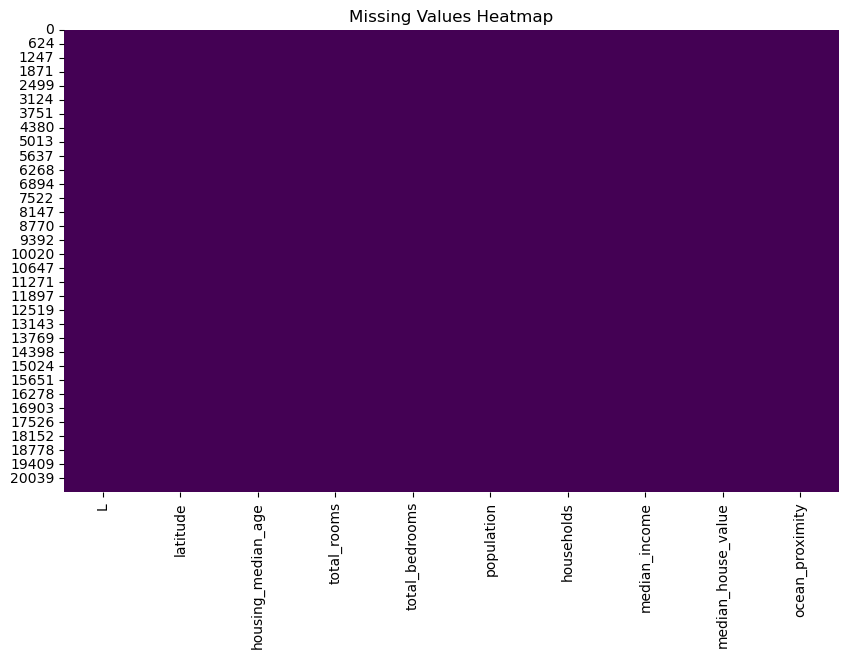

In [317]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [318]:

categorical_cols = df.select_dtypes(include=['string']).columns
print("Categorical columns:", categorical_cols)



Categorical columns: Index([], dtype='object')


In [319]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,L,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [320]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print("numerical_cols:",numerical_cols)

numerical_cols: Index(['L', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')


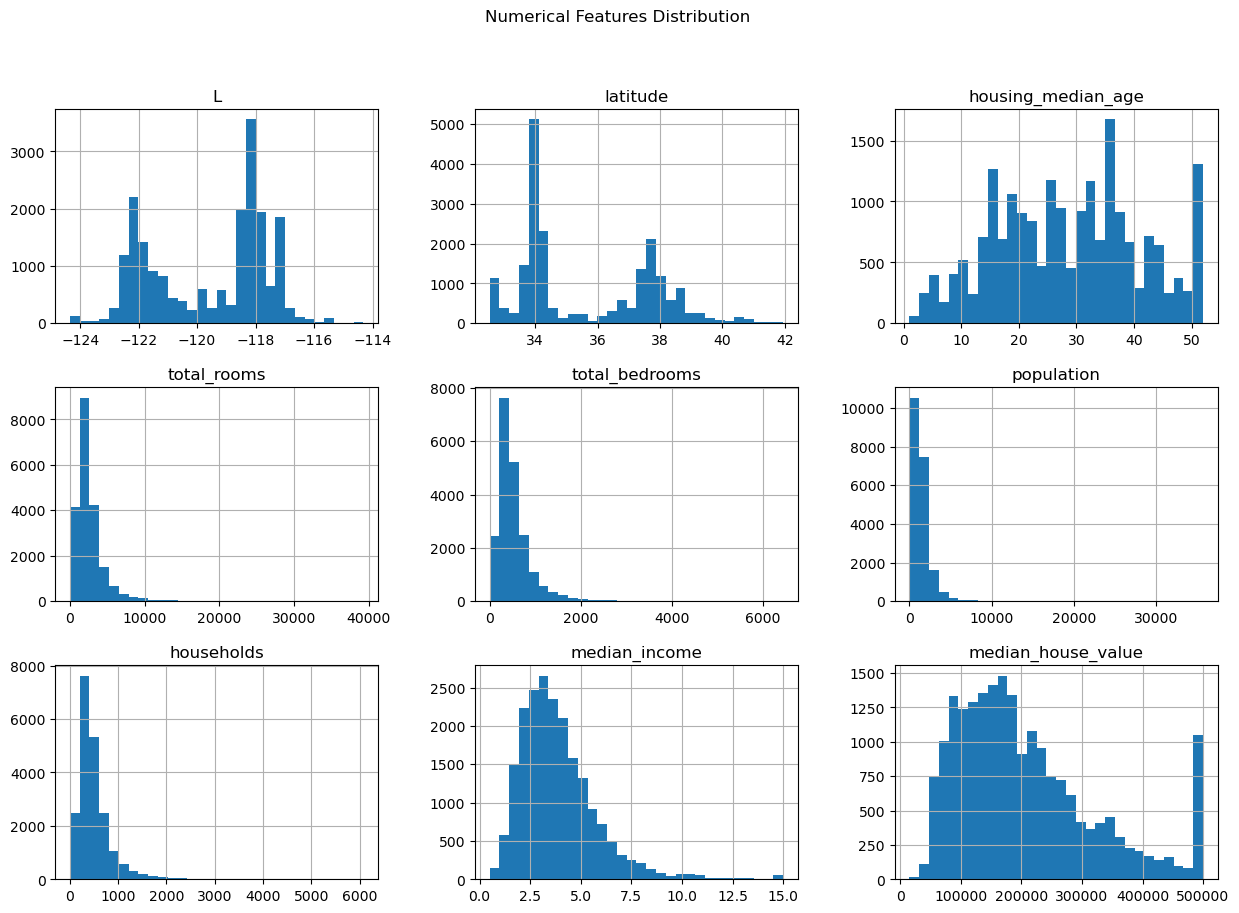

In [321]:
df[numerical_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical Features Distribution")
plt.show()

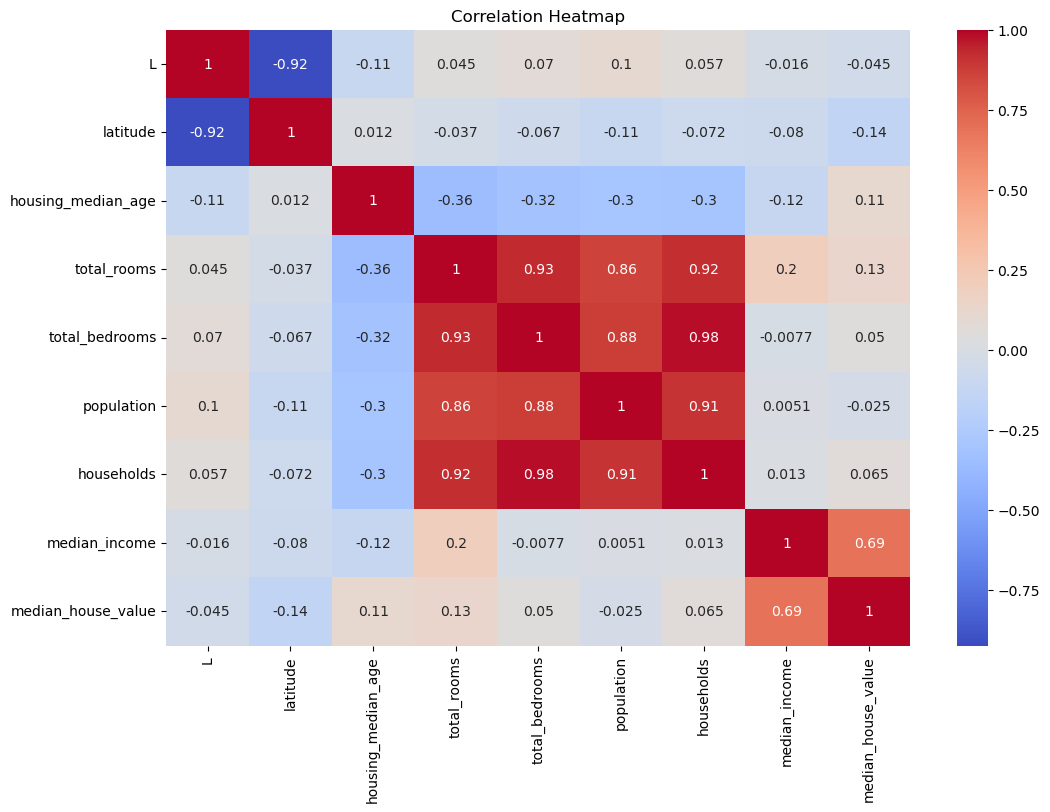

In [322]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [323]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,L,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,INLAND
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,INLAND
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,INLAND
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,INLAND


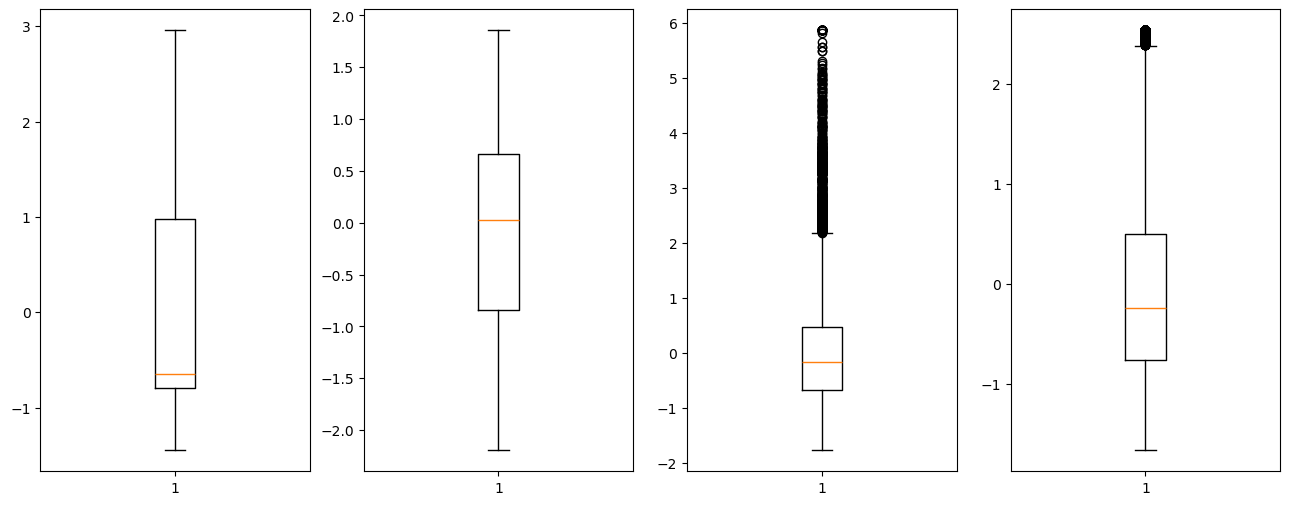

In [324]:
fig, axs = plt.subplots (1,4, figsize = (16,6))
axs[0].boxplot(df.latitude)
axs[1].boxplot(df. housing_median_age)
axs [2].boxplot(df. median_income)
axs [3].boxplot(df.median_house_value)
plt.show()

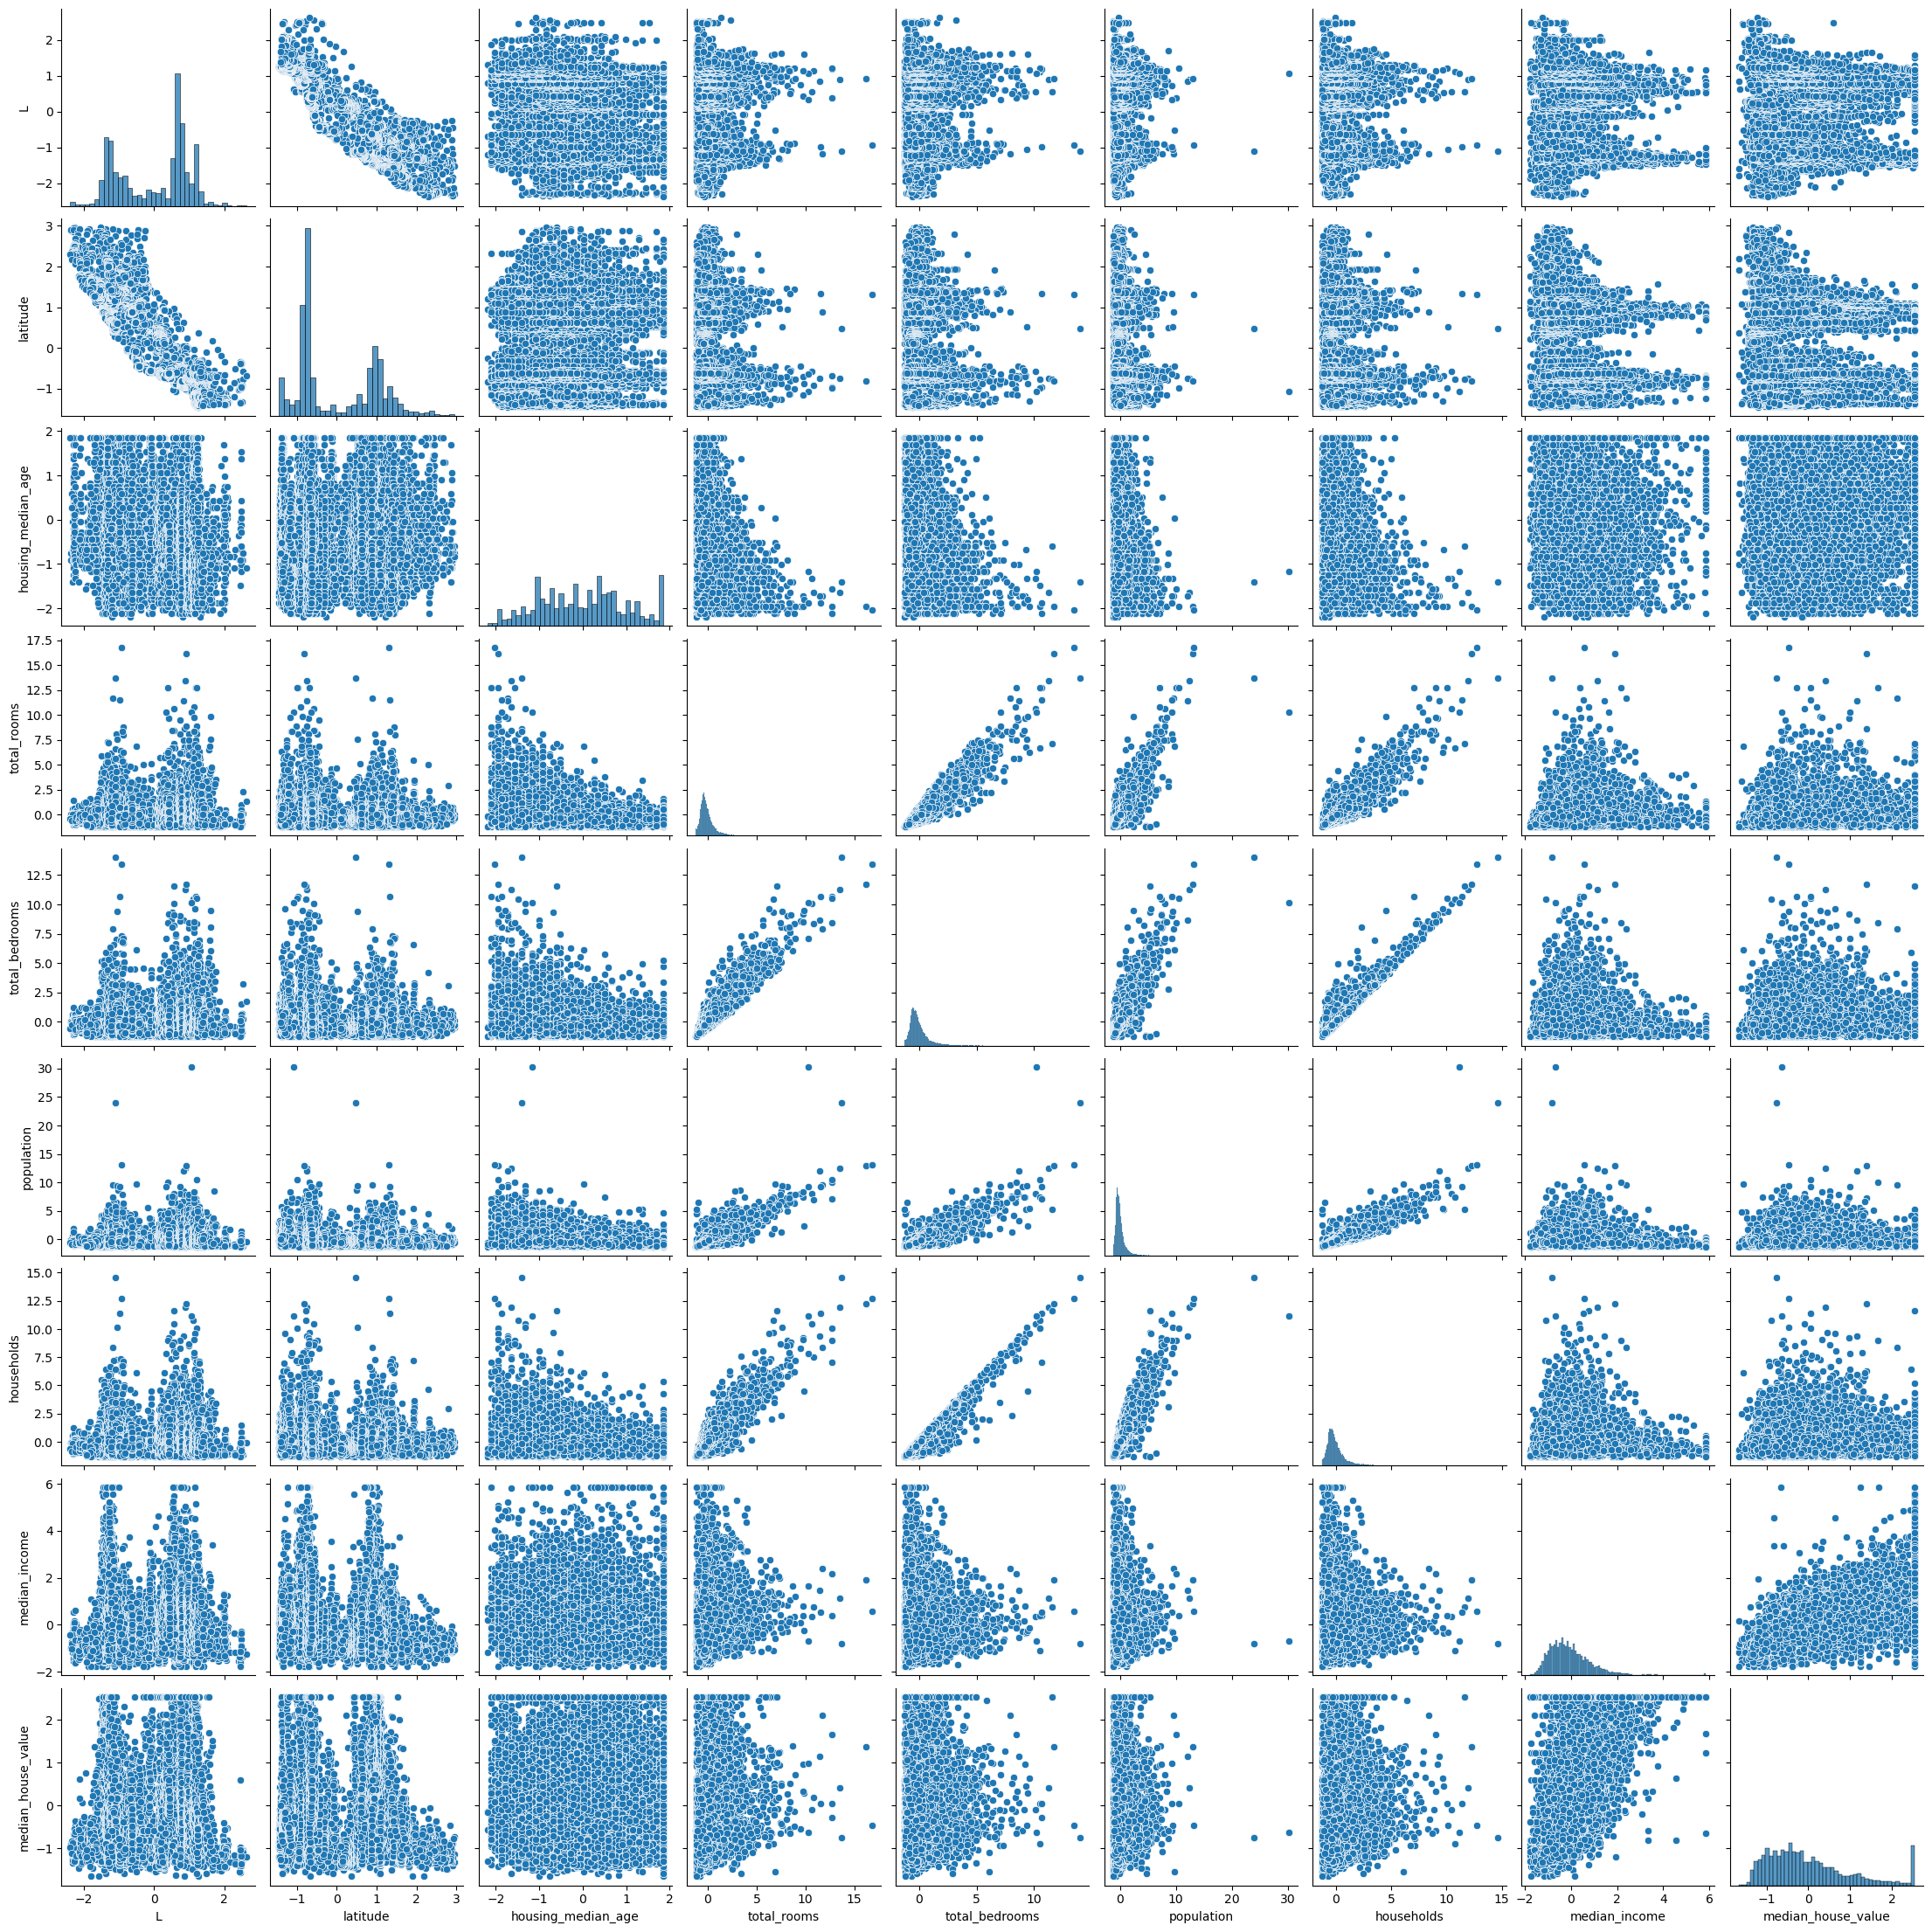

In [325]:
sns.pairplot(df)

Text(0, 0.5, 'population')

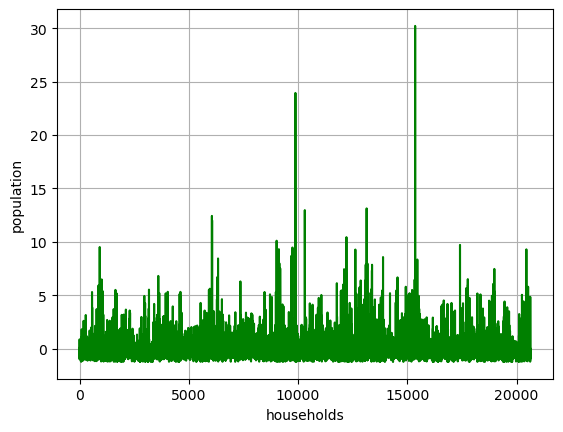

In [326]:
plt.show()
plt.plot(df.population,color="green")
plt.grid()
plt.xlabel("households")
plt.ylabel("population")

In [327]:
se=df[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]
se.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418


In [328]:
x=df[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y=df[["median_house_value"]]

In [329]:
x.shape, y.shape

((20433, 6), (20433, 1))

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [336]:
x_train.shape, y_test.shape, x_test.shape, y_train.shape

((16346, 6), (4087, 1), (4087, 6), (16346, 1))

In [335]:
scaler =StandardScaler()
df["housing_median_age"] = scaler.fit_transform(df[["housing_median_age"]])
df["total_roons"] = scaler.fit_transform(df[["total_rooms"]])
df["total_bedrooms"] = scaler.fit_transform(df[["total_bedrooms"]])
df["population"] = scaler.fit_transform(df[["population"]])
df["households"] = scaler.fit_transform(df[["households"]])
df

,L,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_roons
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY,-0.803813
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY,2.042130
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY,-0.535189
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY,-0.623510
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY,-0.461970
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,INLAND,-0.444580
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,INLAND,-0.887557
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,INLAND,-0.175042
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,INLAND,-0.355344


In [344]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [345]:
model=LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [346]:
model.intercept_ , model.coef_

(array([-0.00096502]),
 array([[ 0.20517043, -0.37645305,  0.38321875, -0.33009932,  0.3852114 ,
          0.78480275]]))

In [347]:
p_val= model.predict(x_test)
p_val

array([[-0.3585131 ],
       [-0.39651356],
       [-0.08672007],
       ...,
       [-0.75736247],
       [-0.24418932],
       [-0.55592375]], shape=(4087, 1))

In [348]:
mean_squared_error(y_test,p_val)#near to 0

0.44020514982377856

In [349]:
r2_score(y_test,p_val)#near to 1

0.5710755317440979